In [215]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [216]:
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [217]:
data = df["chol"]

<AxesSubplot:xlabel='chol', ylabel='Density'>

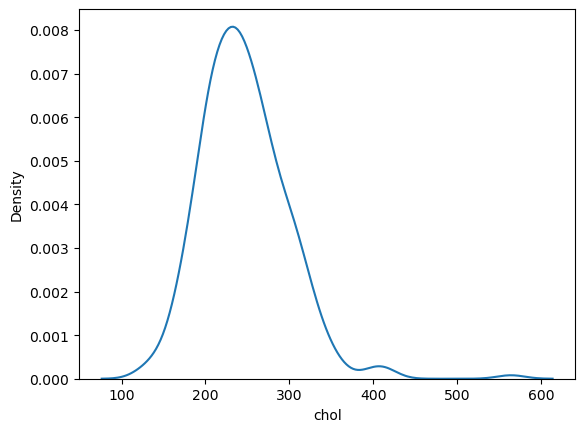

In [218]:
sns.kdeplot(data)

-0.10592568145157065


<AxesSubplot:ylabel='Density'>

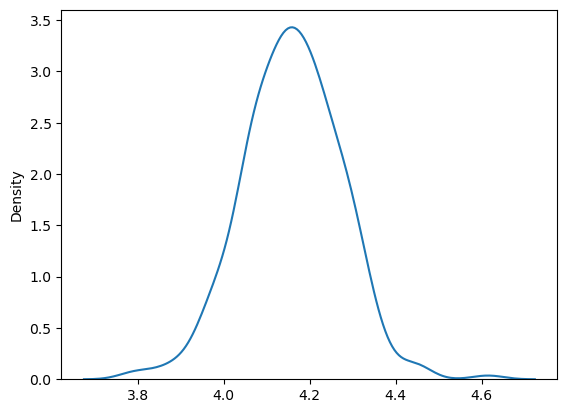

In [220]:
transformed, lambdavalue = stats.boxcox(data)
print(lambdavalue)
sns.kdeplot(transformed)

In [221]:
transformed.sort()
mean, std = stats.norm.fit(transformed, loc=0)
pdf_norm = stats.norm.pdf(transformed, mean, std)

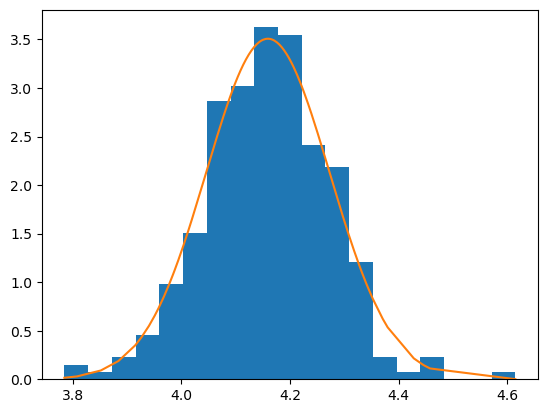

In [234]:
plt.hist(transformed, density=True, bins='auto')
plt.plot(transformed, pdf_norm)
plt.show()

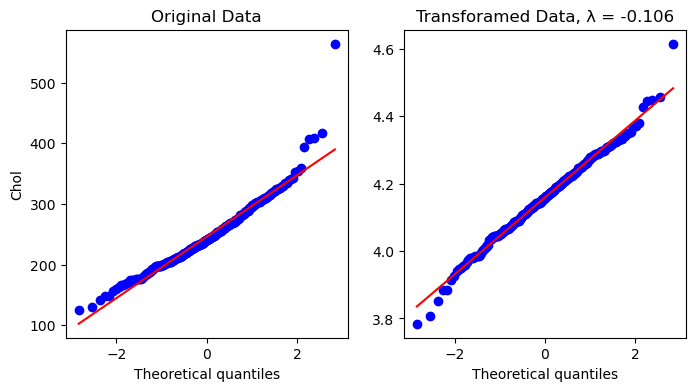

In [236]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
prob = stats.probplot(data, dist=stats.norm, plot=ax1)
prob = stats.probplot(transformed, dist=stats.norm, plot=ax2)
ax1.set_title('Original Data')
ax1.set_ylabel('Chol')
ax2.set_title('Transforamed Data, λ = %s' % round(lambdavalue,3));
ax2.set_ylabel('');
plt.show()

**Another way to transform data :**

<AxesSubplot:ylabel='Density'>

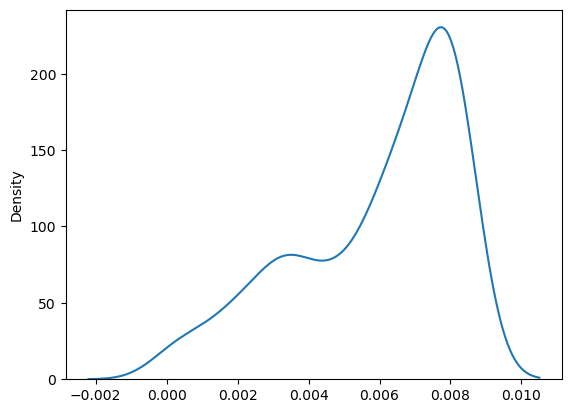

In [238]:
shape, loc, scale = stats.lognorm.fit(data, loc=0)
log_norm = stats.lognorm.pdf(data, shape, loc, scale)
sns.kdeplot(log_norm)

<AxesSubplot:xlabel='chol', ylabel='Density'>

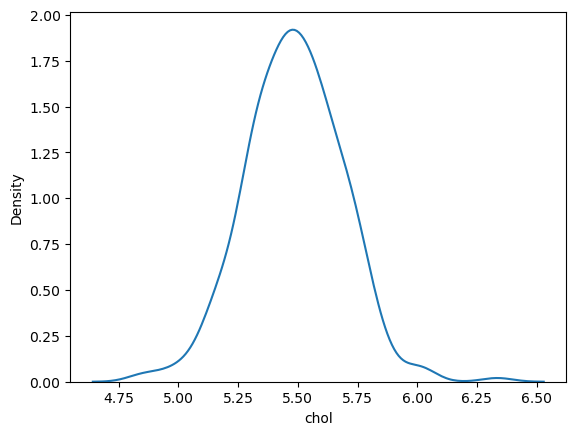

In [239]:
transf = np.log(data)
sns.kdeplot(transf)